In [40]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [41]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

## Perform API Calls

In [42]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
#initiating list
city_data = []
url = "http://api.openweathermap.org/data/2.5/weather?"
print("Beginning Data Retrieval")
print("------------------------")
count = 0
for city in cities:
    
    params = {
        "appid": api_key,
        "q":city
    }
    
    count += 1
    print("Processing Record %s of city %s" %(count, city))
    try:
        response = requests.get(url, params).json()
        #print (json.dumps (response, indent=2))
        city_lat = response["coord"]["lat"] 
        city_lon = response["coord"]["lon"]
        max_temp = response["main"]["temp_max"]
        city_humid = response["main"]["humidity"]
        #city_icon = response["weather"][0]["icon"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]
        
        city_data.append({"City": city,
                         "Latitude":city_lat,
                         "Longitude":city_lon,
                         "Max_temp": max_temp,
                         "Humidity":city_humid,
                         "Cloud Coverage":city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date":city_date})
        
    except:
        print("City not found")
        pass


Beginning Data Retrieval
------------------------
Processing Record 1 of city atuona
Processing Record 2 of city cabedelo
Processing Record 3 of city rikitea
Processing Record 4 of city qujing
Processing Record 5 of city honningsvag
Processing Record 6 of city barrow
Processing Record 7 of city flinders
Processing Record 8 of city taolanaro
City not found
Processing Record 9 of city natal
Processing Record 10 of city tumannyy
City not found
Processing Record 11 of city ushuaia
City not found
Processing Record 12 of city mar del plata
Processing Record 13 of city mataura
Processing Record 14 of city albany
Processing Record 15 of city saskylakh
Processing Record 16 of city tasiilaq
Processing Record 17 of city norman wells
Processing Record 18 of city illoqqortoormiut
City not found
Processing Record 19 of city victoria
Processing Record 20 of city butaritari
Processing Record 21 of city vaini
Processing Record 22 of city bluff
Processing Record 23 of city amderma
City not found
Process

Processing Record 204 of city santa eulalia del rio
City not found
Processing Record 205 of city makakilo city
Processing Record 206 of city kamenskoye
City not found
Processing Record 207 of city we
City not found
Processing Record 208 of city fortuna
Processing Record 209 of city haines junction
Processing Record 210 of city brovary
Processing Record 211 of city ballina
Processing Record 212 of city cabo san lucas
Processing Record 213 of city seoul
Processing Record 214 of city salalah
Processing Record 215 of city port hardy
Processing Record 216 of city altamont
Processing Record 217 of city samagaltay
Processing Record 218 of city mehamn
Processing Record 219 of city werda
Processing Record 220 of city qeshm
Processing Record 221 of city moree
Processing Record 222 of city centralia
Processing Record 223 of city mana
Processing Record 224 of city puerto narino
Processing Record 225 of city bandar-e lengeh
Processing Record 226 of city tilichiki
Processing Record 227 of city bonth

Processing Record 405 of city saint-francois
Processing Record 406 of city cambridge
Processing Record 407 of city mamaku
Processing Record 408 of city sretensk
Processing Record 409 of city sitka
Processing Record 410 of city naze
Processing Record 411 of city ouro preto do oeste
Processing Record 412 of city vanavara
Processing Record 413 of city jiazi
Processing Record 414 of city jacksonville
Processing Record 415 of city elat
Processing Record 416 of city adrar
Processing Record 417 of city maniitsoq
Processing Record 418 of city bud
Processing Record 419 of city praia
Processing Record 420 of city margate
Processing Record 421 of city yerbogachen
Processing Record 422 of city liniere
City not found
Processing Record 423 of city boli
Processing Record 424 of city bathsheba
Processing Record 425 of city porecatu
Processing Record 426 of city dokka
Processing Record 427 of city ugra
Processing Record 428 of city arlit
Processing Record 429 of city madang
Processing Record 430 of cit

In [45]:
city_dataF = pd.DataFrame(city_data)
city_dataF.head()

,City,Cloud Coverage,Country,Date,Humidity,Latitude,Longitude,Max_temp,Wind Speed
0,atuona,0,PF,1535479201,100,-9.80,-139.03,299.428,7.61
1,cabedelo,75,BR,1535475600,58,-6.97,-34.84,301.150,8.20
2,rikitea,88,PF,1535479202,100,-23.12,-134.97,295.928,6.11
3,qujing,12,CN,1535479258,96,25.49,103.80,287.078,1.31
4,honningsvag,75,NO,1535475000,61,70.98,25.97,281.150,3.10


Text(0.5,1,'City Lat vs Max Temp(F) (01/05/17)')

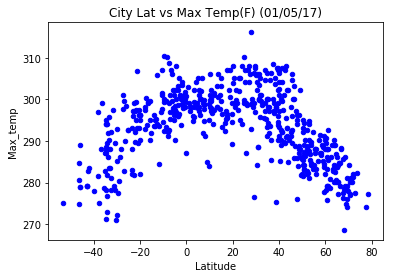

In [60]:
city_dataF.plot.scatter("Latitude","Max_temp", color = "blue")
plt.title("City Lat vs Max Temp(F) (01/05/17)")

Text(0.5,1,'Humidity vs City Lat(01/05/17)')

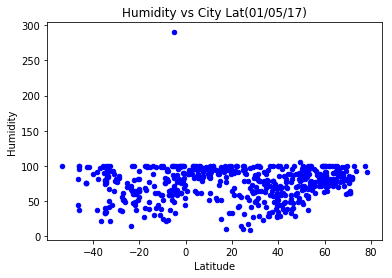

In [59]:
city_dataF.plot.scatter("Latitude","Humidity", color = "blue")
plt.title("Humidity vs City Lat(01/05/17)")

Text(0.5,1,'City Lat vs Cloudiness(01/05/17)')

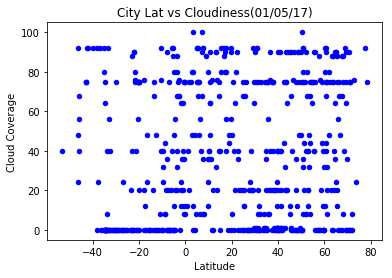

In [61]:
city_dataF.plot.scatter("Latitude","Cloud Coverage", color = "blue")
plt.title("City Lat vs Cloudiness(01/05/17)")

Text(0.5,1,'City Lat vs Wind Speed(01/05/17)')

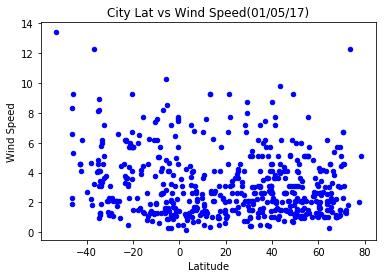

In [58]:
city_dataF.plot.scatter("Latitude","Wind Speed", color = "blue")
plt.title("City Lat vs Wind Speed(01/05/17)")